In [1]:
from PIL import Image
import os, os.path
import cv2
import scipy.ndimage
import numpy as np
import pandas as pd
#from resizeimage import resizeimage ###!pip install pip install python-resize-image
from tqdm import tqdm
import random
import tensorflow as tf
import keras
import keras_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
s=tf.keras.backend.clear_session()

In [3]:
path="D:\\Testing" ###change this to your own photo 

image_list=[]
photos=[]
category_list=[]

for root, dirs, files in os.walk(path):
    for file in tqdm(files):
        try:
            if (file.endswith(".jpg") or file.endswith(".JPG")):
                #print("Discovered this jpg: ", os.path.join(root, file))
                image_file=os.path.join(root, file)
                image=cv2.imread(image_file, cv2.IMREAD_COLOR)
                image=cv2.resize(image, (32,32))
                image=(np.array(image)/255)
                photos.append(np.array(image))
                category_list.append(os.path.join(root,file).split("\\")[-2]) ### CHANGE -3 to -2
        except:
                pass
                

dataset=np.array(photos)
print(dataset.shape)

print("We also have",len(category_list),"number of labels")
print("We have a total of", len(dataset), "number of .jpg files") 

0it [00:00, ?it/s]
100%|██████████| 5322/5322 [00:41<00:00, 128.25it/s]


(42005, 32, 32, 3)
We also have 42005 number of labels
We have a total of 42005 number of .jpg files


In [4]:
dictionary_classes={'Iphone':0, 'Samsung':1, 'Sony':2, 'Xiaomi':3, 'Blackberry':4, 'Lenovo':5,
              'Nokia':6, 'Brandcode':7, 'Infinix':8, 'Oppo':9, 'Vivo':10, 'Asus':11, 'Evercross':12,
               'Advan':13,'Mito':14, 'Huawei':15,'Sharp':16,'Motorola':17,'Strawberry':18,
               'Realme':19,'Icherry':20,'Smartfren':21,'Honor':22, 'Alcatel':23, 'Maxtron':24, 'SPC':25}

In [5]:
labels=[dictionary_classes[k] for k in category_list]

In [6]:
import pickle

with open('mobile_images_clean.pkl','wb') as f:
    pickle.dump([dataset, labels], f)

In [4]:
import pickle

In [5]:
with open('mobile_images_clean.pkl','rb') as f:
    dataset,labels= pickle.load(f)

In [7]:
print(dataset.shape)
print(len(labels))

(42005, 32, 32, 3)
42005


In [8]:
#print("We have a total of", len(file_names), "number of images")
print("We also have",len(labels),"number of categories")
print("We have a total of", len(dataset), "number of .jpg files")

We also have 42005 number of categories
We have a total of 42005 number of .jpg files


In [9]:
from collections import Counter

#Exploratory Data Analysis
In this section, we are doing an exploratory data analysis (EDA).
Our EDA revealed that we have a problem of imbalance classes.

In [10]:
print("The following are the categories:")
print(Counter(labels).keys())
print("\nThe number of photos per categories are:")
print(Counter(labels).values())

The following are the categories:
dict_keys([13, 23, 11, 4, 7, 12, 22, 15, 20, 8, 0, 5, 24, 14, 17, 6, 9, 19, 1, 16, 21, 2, 25, 18, 10, 3])

The number of photos per categories are:
dict_values([2115, 162, 1230, 1010, 691, 838, 352, 757, 115, 326, 6063, 1828, 163, 678, 281, 2648, 3274, 420, 8196, 422, 383, 1698, 54, 284, 2695, 5322])


In [11]:
df=pd.DataFrame([[x,labels.count(x)] for x in set(labels)]).rename(columns={0:'class', 1:'img_count'})
df['percentage_count']=round((df['img_count']/sum(df['img_count'])*100),2)
df

,class,img_count,percentage_count
0,0,6063,14.43
1,1,8196,19.51
2,2,1698,4.04
3,3,5322,12.67
4,4,1010,2.40
5,5,1828,4.35
6,6,2648,6.30
7,7,691,1.65
8,8,326,0.78
9,9,3274,7.79


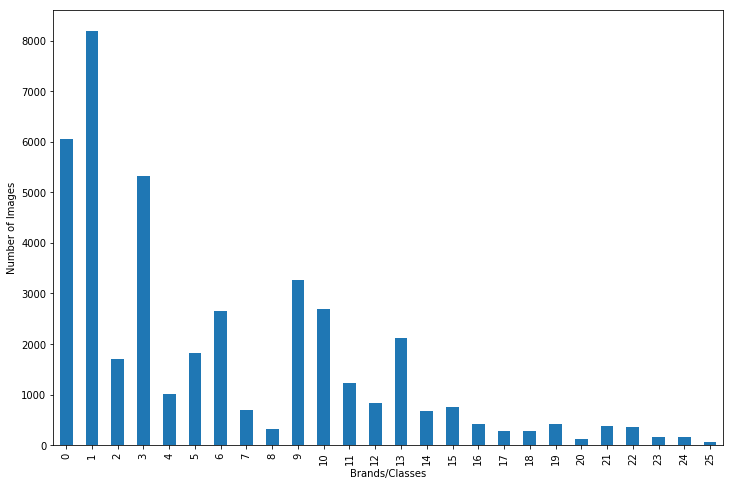

In [12]:
fig = plt.figure(figsize=(12,8))
ax=df['img_count'].plot(kind='bar')

plt.xlabel('Brands/Classes')
plt.ylabel('Number of Images')
plt.grid(False)

In [15]:
import json

file_path_of_classes='C:\\Users\\Admin\\NDSC\\categories.json'

with open(file_path_of_classes) as f:
    class_dict=json.load(f)
    
class_dict['Mobile']

{'Others Mobile & Tablet': 35,
 'Smartfren': 53,
 'Infinix': 40,
 'Brandcode': 39,
 'Icherry': 52,
 'Advan': 45,
 'Iphone': 31,
 'Realme': 51,
 'Motorola': 49,
 'Maxtron': 56,
 'Nokia': 38,
 'Xiaomi': 34,
 'Mito': 46,
 'Sony': 33,
 'SPC': 57,
 'Lenovo': 37,
 'Alcatel': 55,
 'Samsung': 32,
 'Vivo': 42,
 'Evercoss': 44,
 'Strawberry': 50,
 'Blackberry': 36,
 'Asus': 43,
 'Honor': 54,
 'Oppo': 41,
 'Huawei': 47,
 'Sharp': 48}

In [16]:
arranged_classes=sorted(class_dict['Mobile'].items(), key=lambda d: d[1])
total_classes, _=zip(*arranged_classes)
total_classes=list(total_classes)

In [13]:
"""total_classes=['Iphone', 'Samsung', 'Sony', 'Xiaomi', 'Blackberry', 'Lenovo',
              'Nokia', 'Brandcode', 'Infinix', 'Oppo', 'Vivo', 'Asus', 'Evercross',
               'Advan','Mito', 'Huawei','Sharp','Motorola','Strawberry',
               'Realme','Icherry','Honor', 'Alcatel', 'Maxtron', 'SPC']"""
dictionary_classes={'Iphone':0, 'Samsung':1, 'Sony':2, 'Xiaomi':3, 'Blackberry':4, 'Lenovo':5,
              'Nokia':6, 'Brandcode':7, 'Infinix':8, 'Oppo':9, 'Vivo':10, 'Asus':11, 'Evercross':12,
               'Advan':13,'Mito':14, 'Huawei':15,'Sharp':16,'Motorola':17,'Strawberry':18,
               'Realme':19,'Icherry':20,'Smartfren':21,'Honor':22, 'Alcatel':23, 'Maxtron':24, 'SPC':25}
total_classes=list(dictionary_classes.keys())

In [14]:
print(total_classes)
NUM_CLASSES=len(total_classes)
print("There are a total of", NUM_CLASSES, "classes.")

['Iphone', 'Samsung', 'Sony', 'Xiaomi', 'Blackberry', 'Lenovo', 'Nokia', 'Brandcode', 'Infinix', 'Oppo', 'Vivo', 'Asus', 'Evercross', 'Advan', 'Mito', 'Huawei', 'Sharp', 'Motorola', 'Strawberry', 'Realme', 'Icherry', 'Smartfren', 'Honor', 'Alcatel', 'Maxtron', 'SPC']
There are a total of 26 classes.


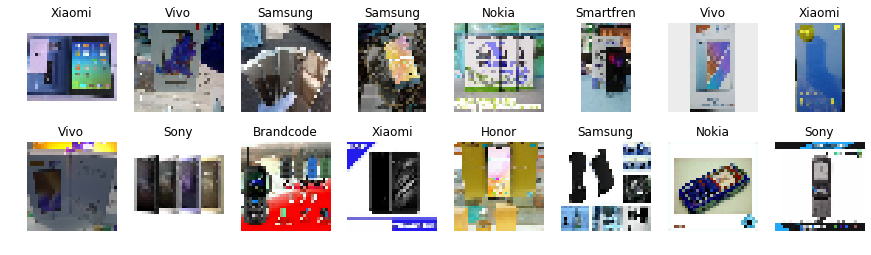

In [15]:
#new_category_list=[int(i) for i in category_list]
#new_category_list.sort()
y=np.c_[np.array(labels)]

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(dataset[random_index, :])
        ax.set_title(total_classes[y[random_index,0]])

In [16]:
def index_finder (category, y):
    indices=np.where(y==[category])[0]
    return indices

def label_changer(category, indices):
    return [category]*len(indices)

def random_sampler(no_of_add_images, category, labels):
    selected_category=index_finder(category, labels)
    rand_indices=np.random.randint(low=min(selected_category), high=max(selected_category), size=no_of_add_images)
    return rand_indices

# The Down Sampler

In [17]:
def add_gaussian (image):
    row, col, ch=image.shape
    mean=0
    var=0.1
    sigma=var**0.5
    gauss=np.random.normal(mean, sigma, (row,col,ch)).reshape(row,col,ch)
    return ((image)+gauss)

def rotate_180 (image):
    return (scipy.ndimage.rotate(image,180))

def mirror_flip (image):
    return (np.flipud(image))

###add other kinds of effects
def image_augmenter (image, type_of_augmenter):
    if type_of_augmenter=="add_gaussian":
        return (add_gaussian(image))
    elif type_of_augmenter=="rotate_180":
        return (rotate_180(image))
    elif type_of_augmenter=='mirror_flip':
        return (mirror_flip(image))
    
def random_sampler(no_of_add_images, category, labels):
    selected_category=index_finder(category, labels)
    rand_indices=np.random.randint(low=min(selected_category), high=max(selected_category), size=no_of_add_images)
    return rand_indices

In [18]:
benchmark=2500
df['class'][df['img_count']<benchmark]

2      2
4      4
5      5
7      7
8      8
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
Name: class, dtype: int64

In [19]:
classes_to_be_upsampled=[2,4,5,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

In [26]:
"""Upsampling for class 2"""
category_no=2
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_2=random_sampler(additional_required_images, category_no, y)
img_2=dataset[ind_2]
label_2=np.c_[label_changer(category_no, img_2)]


"""Upsampling for class 4"""
category_no=4
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_4=random_sampler(additional_required_images, category_no, y)
img_4=dataset[ind_4]
label_4=np.c_[label_changer(category_no, img_4)]

"""Upsamling for class 5"""
category_no=5
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_5=random_sampler(additional_required_images, category_no, y)
img_5=dataset[ind_5]
label_5=np.c_[label_changer(category_no, img_5)]

"""Upsamling for class 7"""

category_no=7
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_7=random_sampler(additional_required_images, category_no, y)
img_7=dataset[ind_7]
label_7=np.c_[label_changer(category_no, img_7)]


"""Upsampling for class 8"""
category_no=8
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_8=random_sampler(additional_required_images, category_no, y)
img_8=dataset[ind_8]
label_8=np.c_[label_changer(category_no, img_8)]


"""Upsampling for class 11"""
category_no=11
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_11=random_sampler(additional_required_images, category_no, y)
img_11=dataset[ind_11]
label_11=np.c_[label_changer(category_no, img_11)]


"""Upsampling for class 12"""
category_no=12
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_12=random_sampler(additional_required_images, category_no, y)
img_12=dataset[ind_12]
label_12=np.c_[label_changer(category_no, img_12)]

"""Upsampling for class 13"""
category_no=13
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_13=random_sampler(additional_required_images, category_no, y)
img_13=dataset[ind_13]
label_13=np.c_[label_changer(category_no, img_13)]

"""Upsampling for class 14"""
category_no=14
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_14=random_sampler(additional_required_images, category_no, y)
img_14=dataset[ind_14]
label_14=np.c_[label_changer(category_no, img_14)]

"""Upsampling for class 15"""
category_no=15
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_15=random_sampler(additional_required_images, category_no, y)
img_15=dataset[ind_15]
label_15=np.c_[label_changer(category_no, img_15)]

"""Upsampling for class 16"""
category_no=16
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_16=random_sampler(additional_required_images, category_no, y)
img_16=dataset[ind_16]
label_16=np.c_[label_changer(category_no, img_16)]


"""Upsampling for class 17"""
category_no=17
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_17=random_sampler(additional_required_images, category_no, y)
img_17=dataset[ind_17]
label_17=np.c_[label_changer(category_no, img_17)]

"""Upsampling for class 18"""
category_no=18
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_18=random_sampler(additional_required_images, category_no, y)
img_18=dataset[ind_18]
label_18=np.c_[label_changer(category_no, img_18)]

"""Upsampling for class 19"""
category_no=19
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_19=random_sampler(additional_required_images, category_no, y)
img_19=dataset[ind_19]
label_19=np.c_[label_changer(category_no, img_19)]

"""Upsampling for class 20"""
category_no=20
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_20=random_sampler(additional_required_images, category_no, y)
img_20=dataset[ind_20]
label_20=np.c_[label_changer(category_no, img_20)]

"""Upsampling for class 21"""
category_no=21
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_21=random_sampler(additional_required_images, category_no, y)
img_21=dataset[ind_21]
label_21=np.c_[label_changer(category_no, img_21)]

"""Upsampling for class 22"""
category_no=22
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_22=random_sampler(additional_required_images, category_no, y)
img_22=dataset[ind_22]
label_22=np.c_[label_changer(category_no, img_22)]

"""Upsampling for class 23"""
category_no=23
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_23=random_sampler(additional_required_images, category_no, y)
img_23=dataset[ind_23]
label_23=np.c_[label_changer(category_no, img_23)]

"""Upsampling for class 24"""
category_no=24
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_24=random_sampler(additional_required_images, category_no, y)
img_24=dataset[ind_24]
label_24=np.c_[label_changer(category_no, img_24)]

"""Upsampling for class 25"""
category_no=25
additional_required_images=benchmark-len(index_finder(category_no,y))

ind_25=random_sampler(additional_required_images, category_no, y)
img_25=dataset[ind_25]
label_25=np.c_[label_changer(category_no, img_25)]

In [27]:
images_to_be_upsampled=[img_2,img_4,img_5,img_7,img_8,img_11,img_12,img_13,img_14,img_15,img_16,
                        img_17,img_18,img_19,img_20,img_21,img_22,img_23,img_24,img_25]
labels_to_be_upsampled=[label_2,label_4,label_5,label_7,label_8,label_11,label_12,label_13,label_14,
                        label_15,label_16,label_17,
                       label_18,label_19,label_20,label_21,label_22,label_23,label_24,label_25]

In [28]:
add_dataset=np.vstack((images_to_be_upsampled))
add_labels=np.vstack((labels_to_be_upsampled))

In [29]:
total_dataset=np.vstack((dataset,add_dataset))
total_labels=np.vstack((y,add_labels))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_dataset, total_labels, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [31]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 611]
 [  1 830]
 [  2 241]
 [  3 524]
 [  4 236]
 [  5 284]
 [  6 271]
 [  7 264]
 [  8 232]
 [  9 329]
 [ 10 257]
 [ 11 258]
 [ 12 254]
 [ 13 232]
 [ 14 242]
 [ 15 256]
 [ 16 237]
 [ 17 241]
 [ 18 261]
 [ 19 253]
 [ 20 249]
 [ 21 270]
 [ 22 254]
 [ 23 240]
 [ 24 262]
 [ 25 232]]


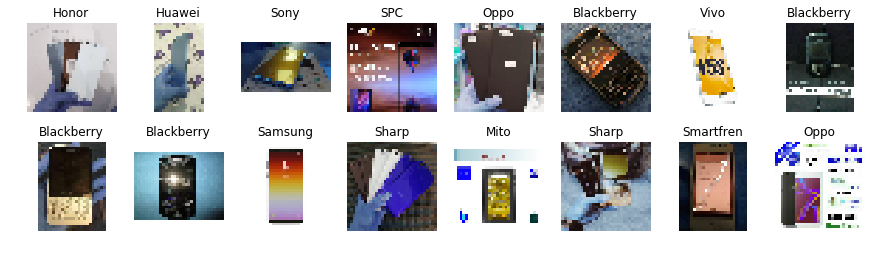

In [37]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(total_classes[y_train[random_index,0]])

##The UpSampler

In [18]:
def add_gaussian (image):
    row, col, ch=image.shape
    mean=0
    var=0.1
    sigma=var**0.5
    gauss=np.random.normal(mean, sigma, (row,col,ch)).reshape(row,col,ch)
    return ((image)+gauss)

def rotate_180 (image):
    return (scipy.ndimage.rotate(image,180))

def mirror_flip (image):
    return (np.flipud(image))

###add other kinds of effects
def image_augmenter (image, type_of_augmenter):
    if type_of_augmenter=="add_gaussian":
        return (add_gaussian(image))
    elif type_of_augmenter=="rotate_180":
        return (rotate_180(image))
    elif type_of_augmenter=='mirror_flip':
        return (mirror_flip(image))

In [19]:
def random_sampler(no_of_add_images, category, labels):
    selected_category=index_finder(category, labels)
    rand_indices=np.random.randint(low=min(selected_category), high=max(selected_category), size=no_of_add_images)
    return rand_indices

In [20]:
"""Upsamling for Brandcode images"""
brandcode_ind=random_sampler(400, 7, y)
brandcode_img=dataset[brandcode_ind]
brandcode_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in brandcode_img])
brandcode_aug_label=np.c_[label_changer(7, brandcode_aug)]

print(brandcode_img.shape)
print(brandcode_aug.shape)
print(brandcode_aug_label.shape)

(400, 64, 64, 3)
(400, 64, 64, 3)
(400, 1)


In [21]:
"""Upsamling for Infinix images"""
infinix_ind=random_sampler(500, 8, y)
infinix_img=dataset[infinix_ind]
infinix_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in infinix_img])
infinix_aug_label=np.c_[label_changer(8, infinix_aug)]

print(infinix_img.shape)
print(infinix_aug.shape)
print(infinix_aug_label.shape)

total_infinix=np.vstack((infinix_img, infinix_aug))
total_infinix_label=np.vstack((infinix_aug_label, infinix_aug_label))

(500, 64, 64, 3)
(500, 64, 64, 3)
(500, 1)


In [22]:
"""Upsamling for Evercross images"""
evercross_ind=random_sampler(400, 12, y)
evercross_img=dataset[evercross_ind]
evercross_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in evercross_img])
evercross_aug_label=np.c_[label_changer(12, evercross_aug)]

print(evercross_aug.shape)
print(evercross_aug_label.shape)

(400, 64, 64, 3)
(400, 1)


In [23]:
"""Upsamling for Mito images"""
mito_ind=random_sampler(500, 14, y)
mito_img=dataset[mito_ind]
mito_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in mito_img])
mito_aug_label=np.c_[label_changer(14, mito_aug)]

print(mito_aug.shape)
print(mito_aug_label.shape)

(500, 64, 64, 3)
(500, 1)


In [24]:
"""Upsamling for Huawei images"""
huawei_ind=random_sampler(500, 15, y)
huawei_img=dataset[huawei_ind]
huawei_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in huawei_img])
huawei_aug_label=np.c_[label_changer(15, huawei_aug)]

print(huawei_aug.shape)
print(huawei_aug_label.shape)

(500, 64, 64, 3)
(500, 1)


In [25]:
"""Upsamling for Sharp images"""
sharp_ind=random_sampler(500, 16, y)
sharp_img=dataset[sharp_ind]
sharp_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in sharp_img])
sharp_aug_label=np.c_[label_changer(16, sharp_aug)]

print(sharp_aug.shape)
print(sharp_aug_label.shape)

(500, 64, 64, 3)
(500, 1)


In [26]:
"""Upsamling for Motorola images"""
moto_ind=random_sampler(400, 17, y)
moto_img=dataset[moto_ind]
moto_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in moto_img])
moto_aug_label=np.c_[label_changer(17, moto_aug)]

print(moto_aug.shape)
print(moto_aug_label.shape)

(400, 64, 64, 3)
(400, 1)


In [27]:
"""Upsampling for Strawberry Images"""
sb_ind=random_sampler(200, 18, y)
sb_img=dataset[sb_ind]
sb_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in sb_img])
sb_aug_label=np.c_[label_changer(18, sb_aug)]

sb_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in sb_img])

print(sb_aug.shape)
print(sb_aug_label.shape)

total_sb=np.vstack((sb_aug, sb_aug_r))
total_sb_label=np.vstack((sb_aug_label, sb_aug_label))

(200, 64, 64, 3)
(200, 1)


In [28]:
"""Upsampling for RealMe Images"""
category_no=19

realme_ind=random_sampler(200, category_no, y)
realme_img=dataset[realme_ind]
realme_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in realme_img])
realme_aug_label=np.c_[label_changer(category_no, realme_aug)]

realme_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in realme_img])

print(realme_aug.shape)
print(realme_aug_label.shape)

total_realme=np.vstack((realme_aug, realme_aug_r))
total_realme_label=np.vstack((realme_aug_label, realme_aug_label))

(200, 64, 64, 3)
(200, 1)


In [29]:
"""Upsampling for Icherry Images"""
category_no=20

icherry_ind=random_sampler(200, category_no, y)
icherry_img=dataset[icherry_ind]
icherry_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in icherry_img])
icherry_aug_label=np.c_[label_changer(category_no, icherry_aug)]

icherry_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in icherry_img])

print(icherry_aug.shape)
print(icherry_aug_label.shape)

total_icherry=np.vstack((icherry_aug, icherry_aug_r))
total_icherry_label=np.vstack((icherry_aug_label, icherry_aug_label))

(200, 64, 64, 3)
(200, 1)


(400, 64, 64, 3)
(400, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


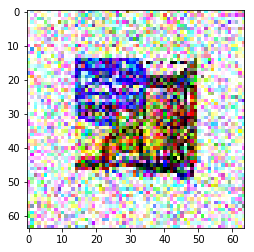

In [30]:
"""Upsamling for Smartfren images"""
category_no=21

smartfren_ind=random_sampler(400, category_no, y)
smartfren_img=dataset[smartfren_ind]
smartfren_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in smartfren_img])
smartfren_aug_label=np.c_[label_changer(category_no, smartfren_aug)]

print(smartfren_aug.shape)
print(smartfren_aug_label.shape)
plt.imshow(smartfren_aug[108])

(200, 64, 64, 3)
(200, 1)


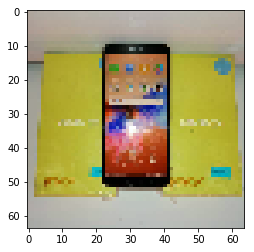

In [31]:
"""Upsamling for Honor images"""
category_no=22

honor_ind=random_sampler(200, category_no, y)
honor_img=dataset[honor_ind]
honor_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in honor_img])
honor_aug_label=np.c_[label_changer(category_no, honor_aug)]

honor_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in honor_img])

print(honor_aug.shape)
print(honor_aug_label.shape)

total_honor=np.vstack((honor_aug, honor_aug_r))
total_honor_label=np.vstack((honor_aug_label, honor_aug_label))
plt.imshow(honor_aug_r[6])

(200, 64, 64, 3)
(200, 1)


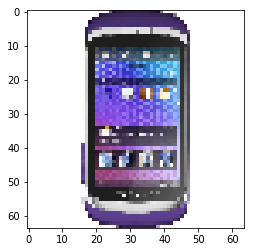

In [32]:
"""Upsamling for Alcatel images"""
category_no=23

alcatel_ind=random_sampler(200, category_no, y)
alcatel_img=dataset[alcatel_ind]
alcatel_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in alcatel_img])
alcatel_aug_label=np.c_[label_changer(category_no, alcatel_aug)]

alcatel_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in alcatel_img])

print(alcatel_aug.shape)
print(alcatel_aug_label.shape)

total_alcatel=np.vstack((alcatel_aug, alcatel_aug_r))
total_alcatel_label=np.vstack((alcatel_aug_label, alcatel_aug_label))
plt.imshow(alcatel_aug_r[8])

In [33]:
"""Upsamling for Maxtron images"""
category_no=24
maxtron_ind=random_sampler(200, category_no, y)
maxtron_img=dataset[maxtron_ind]
maxtron_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in maxtron_img])
maxtron_aug_label=np.c_[label_changer(category_no, maxtron_aug)]

maxtron_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in maxtron_img])

print(maxtron_aug.shape)
print(maxtron_aug_label.shape)

total_maxtron=np.vstack((maxtron_aug, maxtron_aug_r))
total_maxtron_label=np.vstack((maxtron_aug_label, maxtron_aug_label))

(200, 64, 64, 3)
(200, 1)


In [34]:
"""Upsamling for SPC images"""
category_no=25
spc_ind=random_sampler(200, category_no, y)
spc_img=dataset[maxtron_ind]
spc_aug=np.array([image_augmenter(img,type_of_augmenter="add_gaussian") for img in spc_img])
spc_aug_label=np.c_[label_changer(category_no, spc_aug)]

spc_aug_r=np.array([image_augmenter(img,type_of_augmenter="mirror_flip") for img in spc_img])

print(spc_aug.shape)
print(spc_aug_label.shape)

total_spc=np.vstack((spc_aug, spc_aug_r, spc_img))
total_spc_label=np.vstack((spc_aug_label,spc_aug_label,spc_aug_label))

(200, 64, 64, 3)
(200, 1)


In [35]:
extra_aug_list=[brandcode_aug,total_infinix, evercross_aug, mito_aug,huawei_aug, sharp_aug, moto_aug, 
                total_sb, total_realme,total_icherry, smartfren_aug, total_honor,
                total_alcatel, total_maxtron, total_spc]
extra_aug_label_list=[brandcode_aug_label,total_infinix_label,evercross_aug_label,mito_aug_label, huawei_aug_label,
                      sharp_aug_label,moto_aug_label,total_sb_label,total_realme_label,total_icherry_label,
                      smartfren_aug_label,total_honor_label,total_alcatel_label,
                     total_maxtron_label,total_spc_label]

In [36]:
extra_aug_img=np.vstack((extra_aug_list))
extra_aug_labels=np.vstack((extra_aug_label_list))

print(extra_aug_img.shape)
print(extra_aug_labels.shape)

(7100, 64, 64, 3)
(7100, 1)


In [37]:
X_train2=np.vstack((X_train, extra_aug_img))
y_train2=np.vstack((y_train,extra_aug_labels))

print(X_train2.shape)
print(y_train2.shape)

(44923, 64, 64, 3)
(44923, 1)


# START OF TRAINING MODEL

In [32]:
s=tf.keras.backend.clear_session()

In [33]:
#X_train2 = (X_train/255)-0.5
#X_val2 = (X_val/255)-0.5
#X_test2=(X_test/255)-0.5

# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, dtype='int')
y_val2 = keras.utils.to_categorical(y_val, dtype='int')
y_test2=keras.utils.to_categorical(y_test,dtype='int')

In [34]:
from keras import backend
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
#from keras_tqdm import TQDMNotebookCallback

In [43]:

def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same',input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
              
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
                  
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
            
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dense(NUM_CLASSES))
    model.add(Activation('softmax'))
              

    ### YOUR CODE HERE
    
    return model

In [1]:
"""
###THIS IS FOR SGD
LR = 0.001
BATCH_SIZE = 32
EPOCHS = 70

model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  
    optimizer=keras.optimizers.SGD(lr=LR, decay=1e-6, momentum=0.9, nesterov=True),  
    metrics=['accuracy']  
)"""

"""BELOW IS FOR VGG 16"""

#INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 16
EPOCHS = 20

#s = reset_tf_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adam(lr=0.001),  
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

model.summary()

NameError: name 'make_model' is not defined

In [45]:
model.fit(
    X_train, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],
    validation_data=(X_val, y_val2),
    shuffle=True,
    verbose=2)

Train on 63340 samples, validate on 7038 samples
Epoch 1/20
 - 63s - loss: 3.0195 - acc: 0.1370 - val_loss: 2.8375 - val_acc: 0.1904
Epoch 2/20
 - 36s - loss: 2.6126 - acc: 0.2504 - val_loss: 2.3293 - val_acc: 0.3208
Epoch 3/20
 - 37s - loss: 2.3449 - acc: 0.3206 - val_loss: 2.1182 - val_acc: 0.3782
Epoch 4/20
 - 37s - loss: 2.1780 - acc: 0.3629 - val_loss: 2.0138 - val_acc: 0.4122
Epoch 5/20
 - 38s - loss: 2.0608 - acc: 0.3946 - val_loss: 1.8105 - val_acc: 0.4653
Epoch 6/20
 - 40s - loss: 1.9777 - acc: 0.4185 - val_loss: 1.7652 - val_acc: 0.4783
Epoch 7/20
 - 36s - loss: 1.9099 - acc: 0.4360 - val_loss: 1.7040 - val_acc: 0.4947
Epoch 8/20
 - 36s - loss: 1.8515 - acc: 0.4500 - val_loss: 1.7551 - val_acc: 0.4842
Epoch 9/20
 - 36s - loss: 1.8105 - acc: 0.4612 - val_loss: 1.6637 - val_acc: 0.5104
Epoch 10/20
 - 37s - loss: 1.7644 - acc: 0.4719 - val_loss: 1.5533 - val_acc: 0.5342
Epoch 11/20
 - 36s - loss: 1.7442 - acc: 0.4772 - val_loss: 1.5379 - val_acc: 0.5314
Epoch 12/20
 - 37s - loss

In [47]:
y_pred_test = model.predict_proba(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

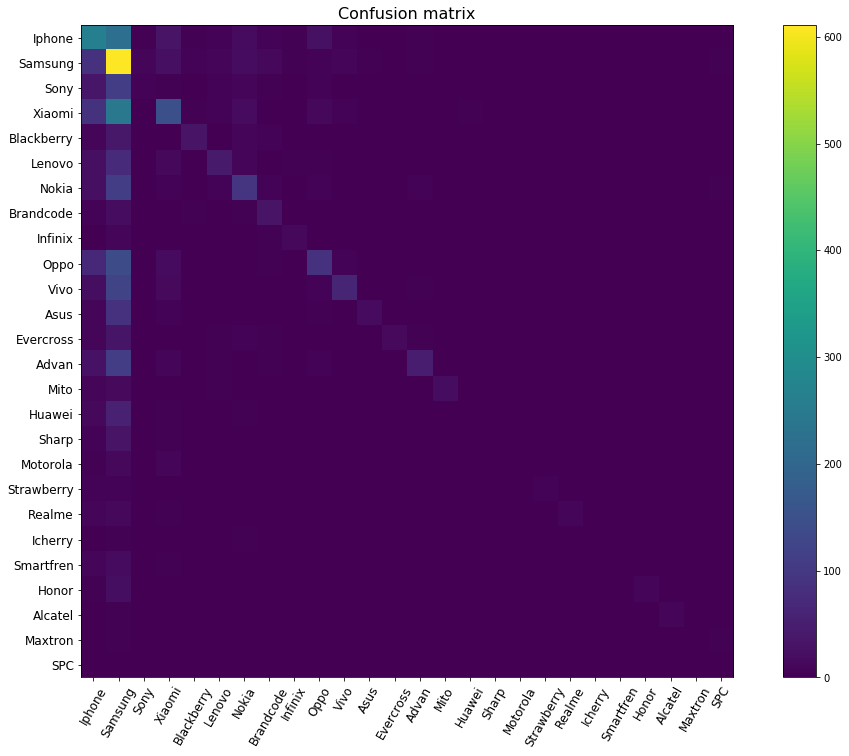

Test accuracy: 0.3656911729716869


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(18, 12))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(NUM_CLASSES), total_classes, rotation=60, fontsize=12)
plt.yticks(np.arange(NUM_CLASSES), total_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

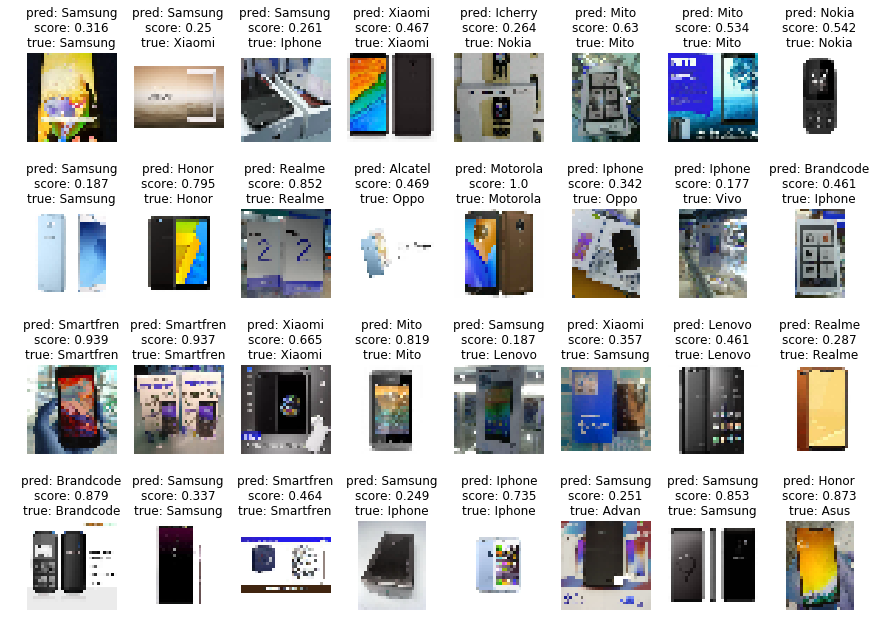

In [48]:
cols = 8
rows = 4
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test)+1)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = total_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = total_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [49]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined